# Final Project Submission

Please fill out:
* Student name: Joey Husney
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL: https://jhusney1.github.io/why_is_multicollinearity_a_problem_for_linear_regression


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

## Project goals and methodology

As a real estate agency, we need to give recommendations to customers on how to increase the value of their home. This will be done through analyzing the data in the "King County House Sales" dataset and investigating which features are correlated with higher sales prices. Using the OSEMN process, we hope to give suggestions that are meaningful and reliable. The OSEMN framework consists of an iterative process of Obtaining the data, Scrubbing it, Exploring, Modeling, and iNterpreting the data into meaningful suggestions for the client.

## The Data

The king county house sales dataset contains data from houses sold between the time period May 2014 - May 2015. The following features are contained in this dataset:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# OBTAIN

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm  
import statsmodels.formula.api as smf

pd.options.display.max_columns = 100

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20,15)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [65]:
kings_df = pd.read_csv('kc_house_data.csv', index_col='id')
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [66]:
kings_df.shape

(21597, 20)

In [67]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

## Observations
* May want to convert date column to date datatype
* sqr foot basement should be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [68]:
kings_df_cleaned = kings_df.copy()
kings_df_cleaned['date'] = pd.to_datetime(kings_df_cleaned['date']) 

In [69]:
kings_df_cleaned['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### Check for NULL values

In [70]:
kings_df_cleaned.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [71]:
kings_df_cleaned['waterfront'].head()

id
7129300520       nan
6414100192   0.00000
5631500400   0.00000
2487200875   0.00000
1954400510   0.00000
Name: waterfront, dtype: float64

In [72]:
kings_df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.88322
nan       0.11002
1.00000   0.00676
Name: waterfront, dtype: float64

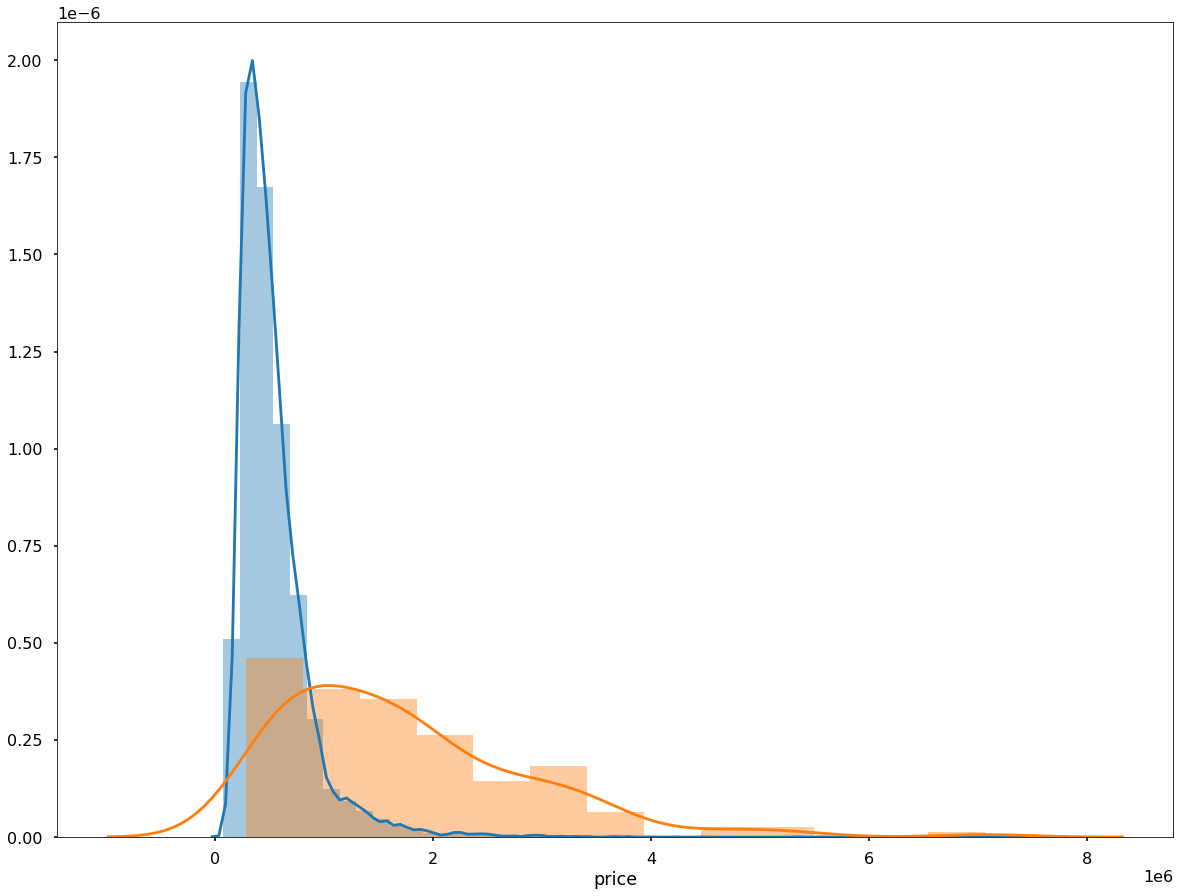

In [73]:
df_no_waterfront = kings_df_cleaned[kings_df_cleaned['waterfront'] == 0] 
df_yes_waterfront = kings_df_cleaned[kings_df_cleaned['waterfront'] == 1] 
sns.distplot(df_no_waterfront['price'], label='no waterfront')
sns.distplot(df_yes_waterfront['price'], label='with waterfront')

### Seems like sale price increases due to waterfront, therefore, this feature will stay. We will get rid of null values by replacing the nulls with 0 assuming they don't have a waterfront if it's unavailable.

In [74]:
# replace null values with zero
kings_df_cleaned['waterfront'].fillna(0, inplace=True)

In [75]:
kings_df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.99324
1.00000   0.00676
Name: waterfront, dtype: float64

### Now let's anylize the null values in view column

In [76]:
kings_df_cleaned['view'].value_counts(normalize=True, dropna=False)

0.00000   0.89929
2.00000   0.04431
3.00000   0.02352
1.00000   0.01528
4.00000   0.01468
nan       0.00292
Name: view, dtype: float64

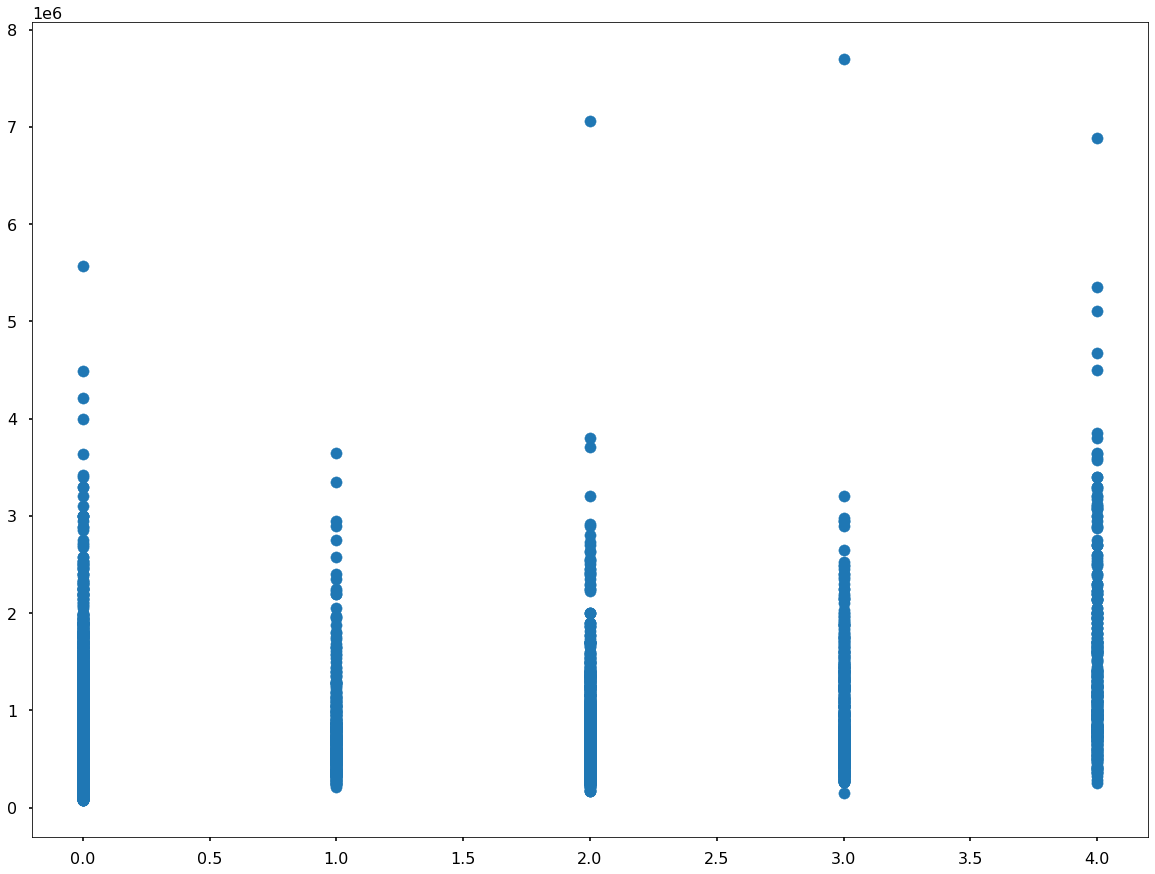

In [77]:
fig, ax = plt.subplots()
ax.scatter(kings_df_cleaned['view'], kings_df_cleaned['price'])

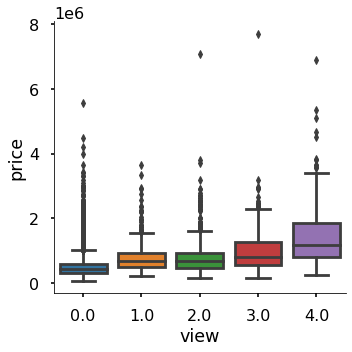

In [78]:
sns.catplot(data=kings_df_cleaned, x='view', y='price', kind='box')

### For simplicity sake and to get rid of null values, we will create boolean values based on whether or not the house has been viewed

In [79]:
def convert_to_bool(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [80]:
kings_df_cleaned['view'] = kings_df_cleaned['view'].map(convert_to_bool)
kings_df_cleaned['view'].value_counts(normalize=True, dropna=False)

0   0.90221
1   0.09779
Name: view, dtype: float64

In [81]:
kings_df_cleaned.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [82]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0.00000      0.78766
nan          0.17790
2014.00000   0.00338
2003.00000   0.00144
2013.00000   0.00144
               ...  
1944.00000   0.00005
1948.00000   0.00005
1976.00000   0.00005
1934.00000   0.00005
1953.00000   0.00005
Name: yr_renovated, Length: 71, dtype: float64

> Because 78% of these houses were not renovated, we will make this column into a 0 and 1's column based on whether each particular house was renovated or not

In [83]:
kings_df_cleaned['yr_renovated'] = kings_df_cleaned['yr_renovated'].map(convert_to_bool)

In [84]:
kings_df_cleaned['yr_renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: yr_renovated, dtype: float64

In [85]:
kings_df_cleaned.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
kings_df_cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0,3,7,1180,0.0,1955,0,98178,47.51120,-122.25700,1340,5650
6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0,3,7,2170,400.0,1951,1,98125,47.72100,-122.31900,1690,7639
5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0,3,6,770,0.0,1933,0,98028,47.73790,-122.23300,2720,8062
2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0,5,7,1050,910.0,1965,0,98136,47.52080,-122.39300,1360,5000
1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0,3,8,1680,0.0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.00000,3,2.50000,1530,1131,3.00000,0.00000,0,3,8,1530,0.0,2009,0,98103,47.69930,-122.34600,1530,1509
6600060120,2015-02-23,400000.00000,4,2.50000,2310,5813,2.00000,0.00000,0,3,8,2310,0.0,2014,0,98146,47.51070,-122.36200,1830,7200
1523300141,2014-06-23,402101.00000,2,0.75000,1020,1350,2.00000,0.00000,0,3,7,1020,0.0,2009,0,98144,47.59440,-122.29900,1020,2007


In [86]:
kings_df_cleaned['renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: renovated, dtype: float64

In [87]:
kings_df_cleaned.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We now got rid of all known null values!

#### Convert sqft_basement from String to Float data type

In [88]:
kings_df_cleaned['sqft_basement'] = pd.to_numeric(kings_df_cleaned['sqft_basement'], errors='coerce')
kings_df_cleaned['sqft_basement']

id
7129300520     0.00000
6414100192   400.00000
5631500400     0.00000
2487200875   910.00000
1954400510     0.00000
                ...   
263000018      0.00000
6600060120     0.00000
1523300141     0.00000
291310100      0.00000
1523300157     0.00000
Name: sqft_basement, Length: 21597, dtype: float64

In [89]:
kings_df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.59388
nan          0.02102
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
               ...  
588.00000    0.00005
1920.00000   0.00005
2390.00000   0.00005
1245.00000   0.00005
1135.00000   0.00005
Name: sqft_basement, Length: 304, dtype: float64

> Something must be done about these newly discovered null values. Perhaps we will assume that a null value means no basement. Partially because the mode is zero anyhow.

In [90]:
kings_df_cleaned['sqft_basement'].fillna(0, inplace=True)
kings_df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.61490
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
800.00000    0.00931
               ...  
915.00000    0.00005
295.00000    0.00005
1281.00000   0.00005
2130.00000   0.00005
906.00000    0.00005
Name: sqft_basement, Length: 303, dtype: float64

### Question 2: Is there any multicollinearity occuring between different columns therby skewing the model for sale price?

In [91]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

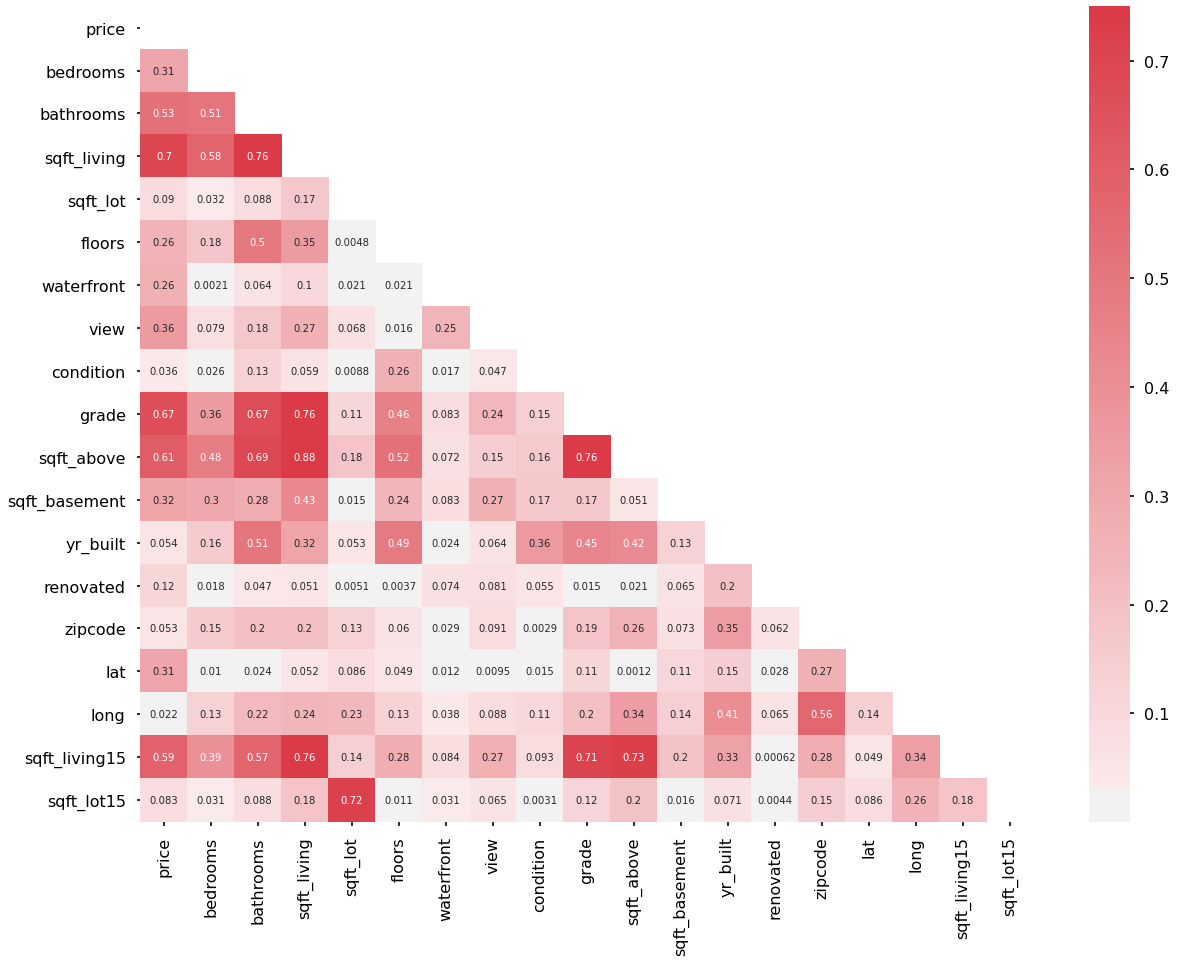

In [92]:
check_multicol(kings_df_cleaned)

### Answer 2: Multicollinearity found in following combinations:
* sqft_above and sqft_living
* sqft_living and bathrooms
* grade and sqft_living
* sqft_above and sqft_living
* sqft_above and grade
* sqft_living15 and sqft_living
* sqft_living15 and sqft_above
* sqft_living15 and grade
* sqft_lot15 and sqft_lot

In [93]:
# High multicolinearity occuring in sqft_living
# Check if it adds any value to dataset
sqft_sample = kings_df_cleaned[kings_df_cleaned['sqft_basement'] > 0].sample(5, random_state=15)
sqft_sample[['sqft_above', 'sqft_living', 'sqft_basement']]
# telling us to drop sqft_living - no added value

,sqft_above,sqft_living,sqft_basement
id,,,
1934800087,1080,1370,290.00000
2051200436,2242,3490,1248.00000
9250900104,1100,2110,1010.00000
1189000492,1140,1405,265.00000
3223059123,1500,2750,1250.00000


### Drop sqft_living

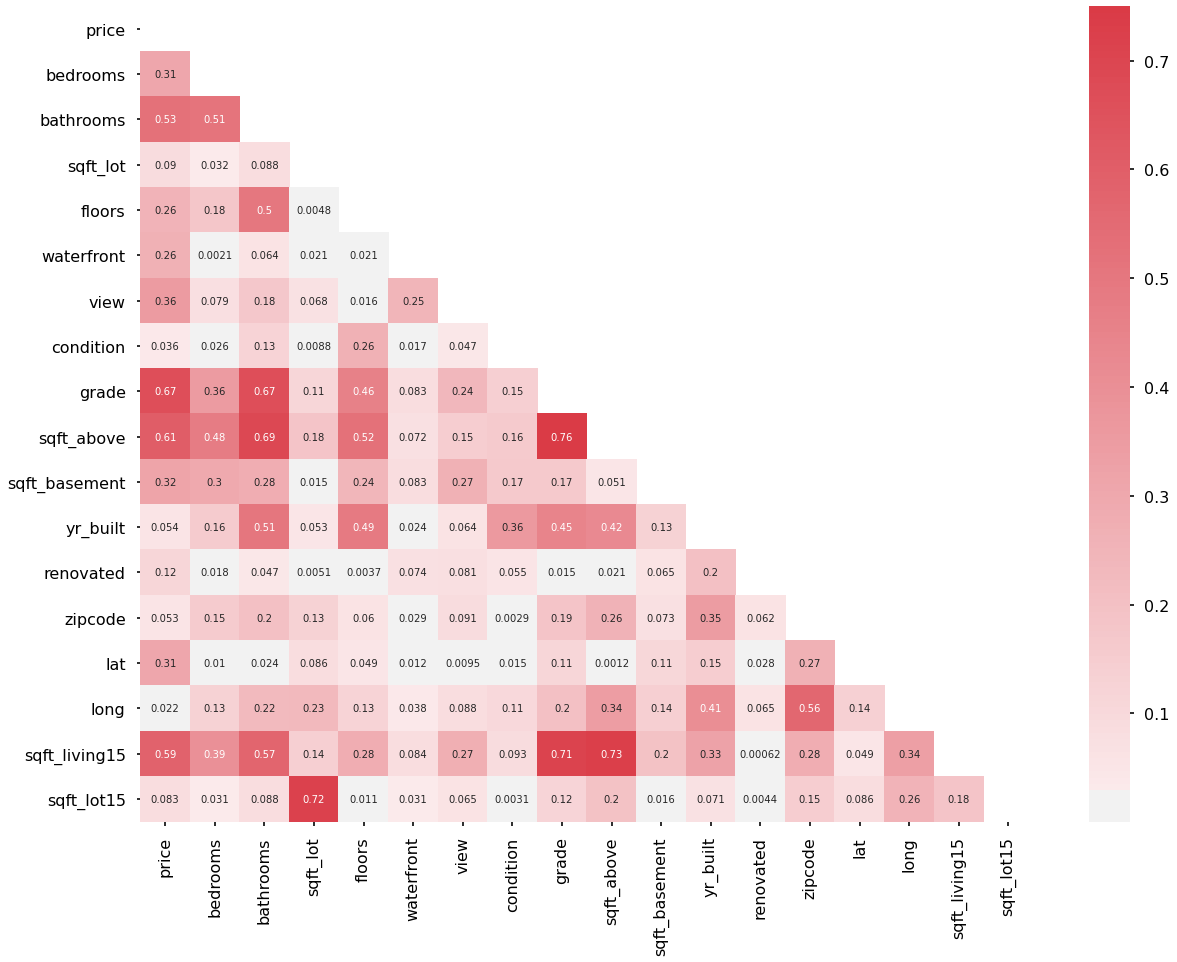

In [94]:
kings_df_cleaned.drop(['sqft_living'], axis=1, inplace=True)
check_multicol(kings_df_cleaned)

### Drop some other columns that aren't so important in the bigger scheme of things

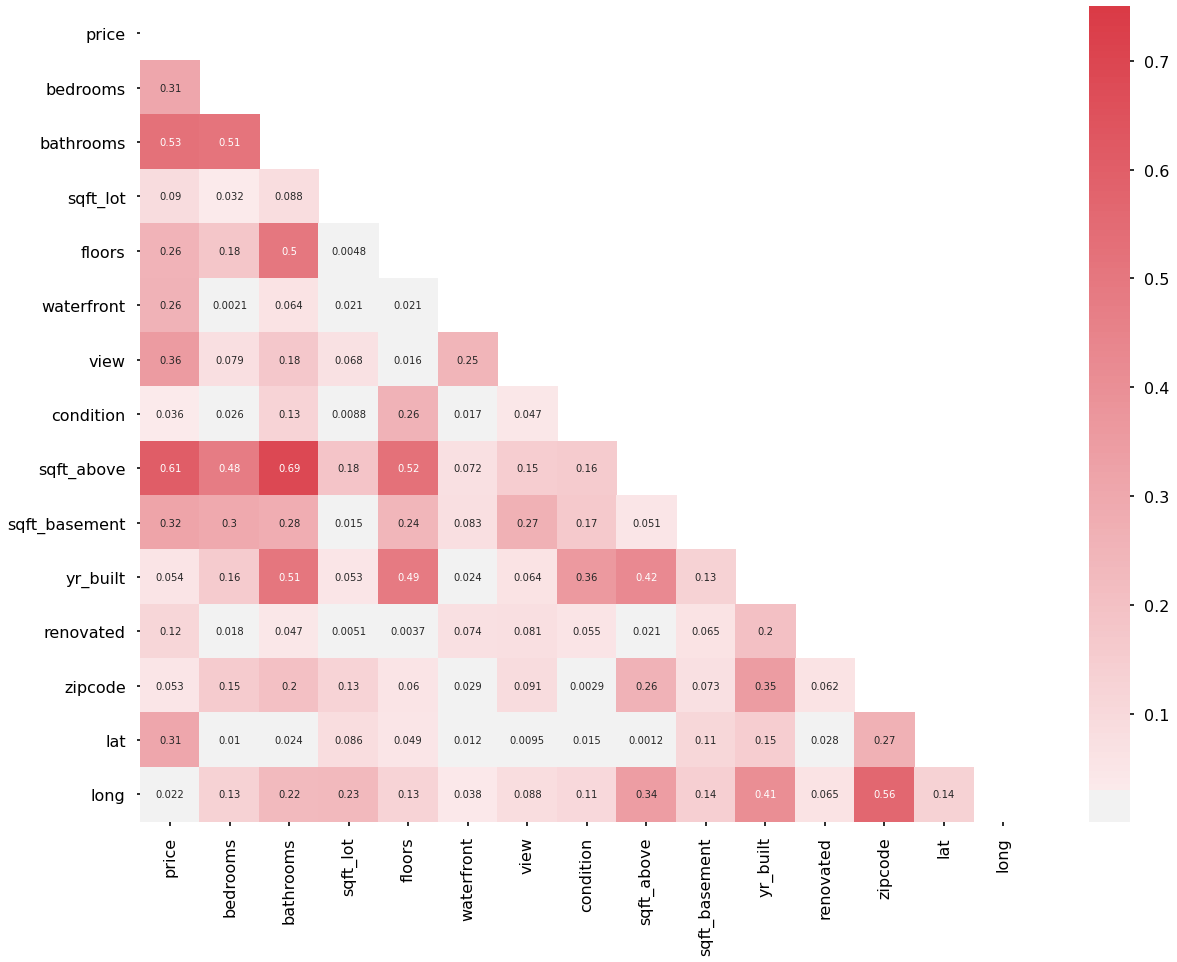

In [95]:
kings_df_cleaned.drop(['sqft_living15'], inplace=True, axis=1)
kings_df_cleaned.drop(['sqft_lot15'], inplace=True, axis=1)
kings_df_cleaned.drop(['grade'], inplace=True, axis=1)
check_multicol(kings_df_cleaned)

# EXPLORE

In [96]:
# # trying to get markers on map
# import folium
# min_long = kings_df_cleaned['long'].min()
# max_long = kings_df_cleaned['long'].max()
# min_lat = kings_df_cleaned['lat'].min()
# max_lat = kings_df_cleaned['lat'].max()
# # print(min_long, max_long, min_lat, max_lat)
# m = folium.Map()
# m.fit_bounds([[min_lat, min_long], [max_lat, max_long]])

# for i in range(0,len(kings_df_cleaned)):
#     folium.Marker([kings_df_cleaned.iloc[i]['long'], kings_df_cleaned.iloc[i]['lat']]).add_to(m)
    
# m


### Identify outliers

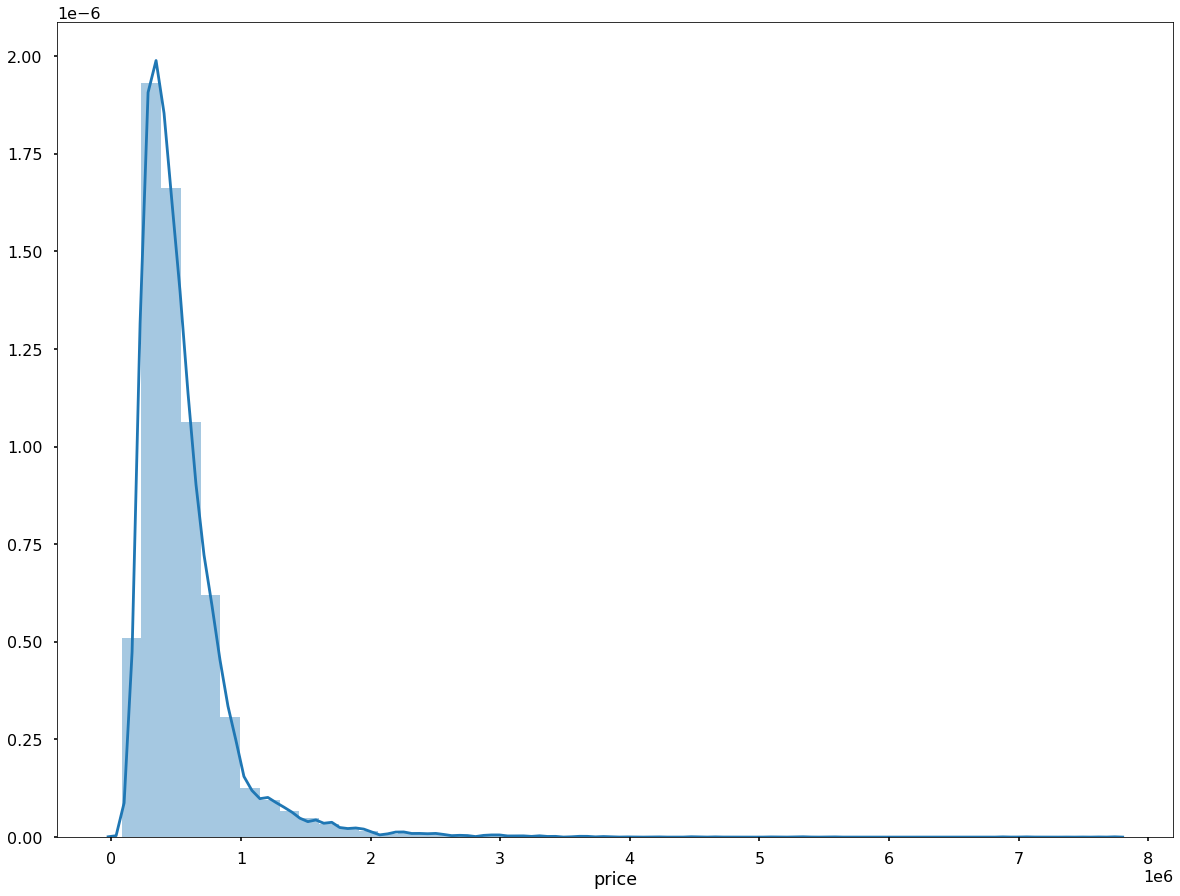

In [97]:
target = 'price'
sns.distplot(kings_df_cleaned[target])

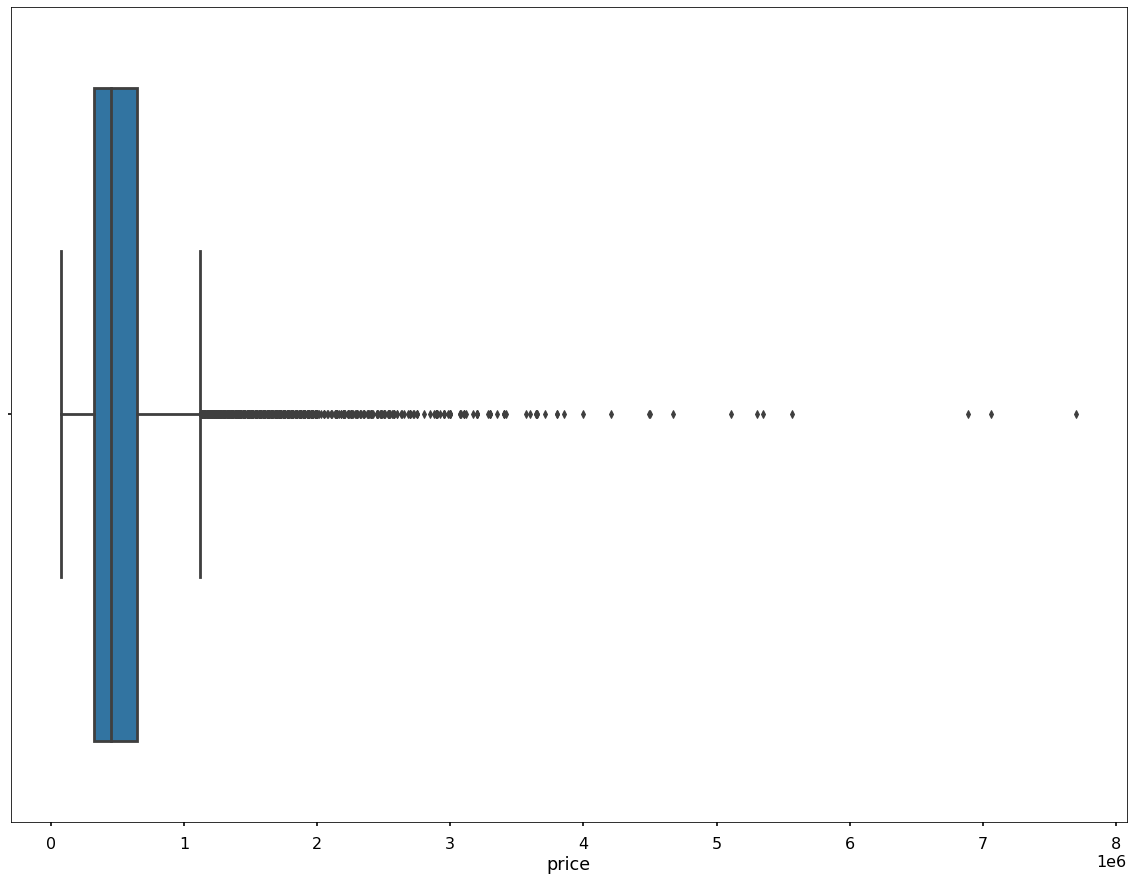

In [98]:
sns.boxplot(kings_df_cleaned[target])

> We see clearly from both the histogram and the whisker plot that there are many outliers for price column

### Remove outliers

In [99]:
import scipy
z_price = scipy.stats.zscore(kings_df_cleaned['price'])
z_price = np.abs(z_price)
z_price

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

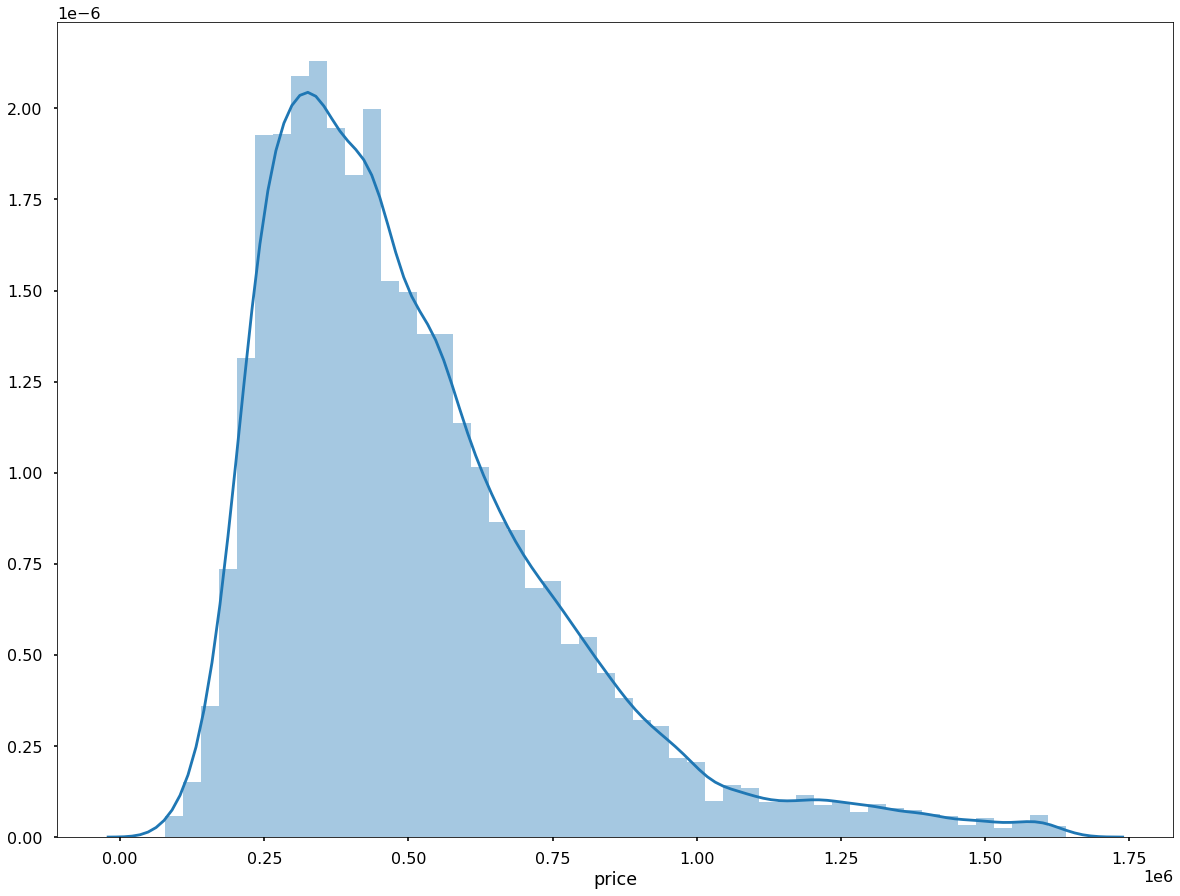

In [100]:
# Preview histogram before changing
sns.distplot(kings_df_cleaned[z_price < 3]['price'])

In [101]:
# Make changes
kings_df_cleaned = kings_df_cleaned[z_price < 3]
kings_df_cleaned.shape


# Maybe go back and remove more outliers from other cols based on modeling

(21191, 16)

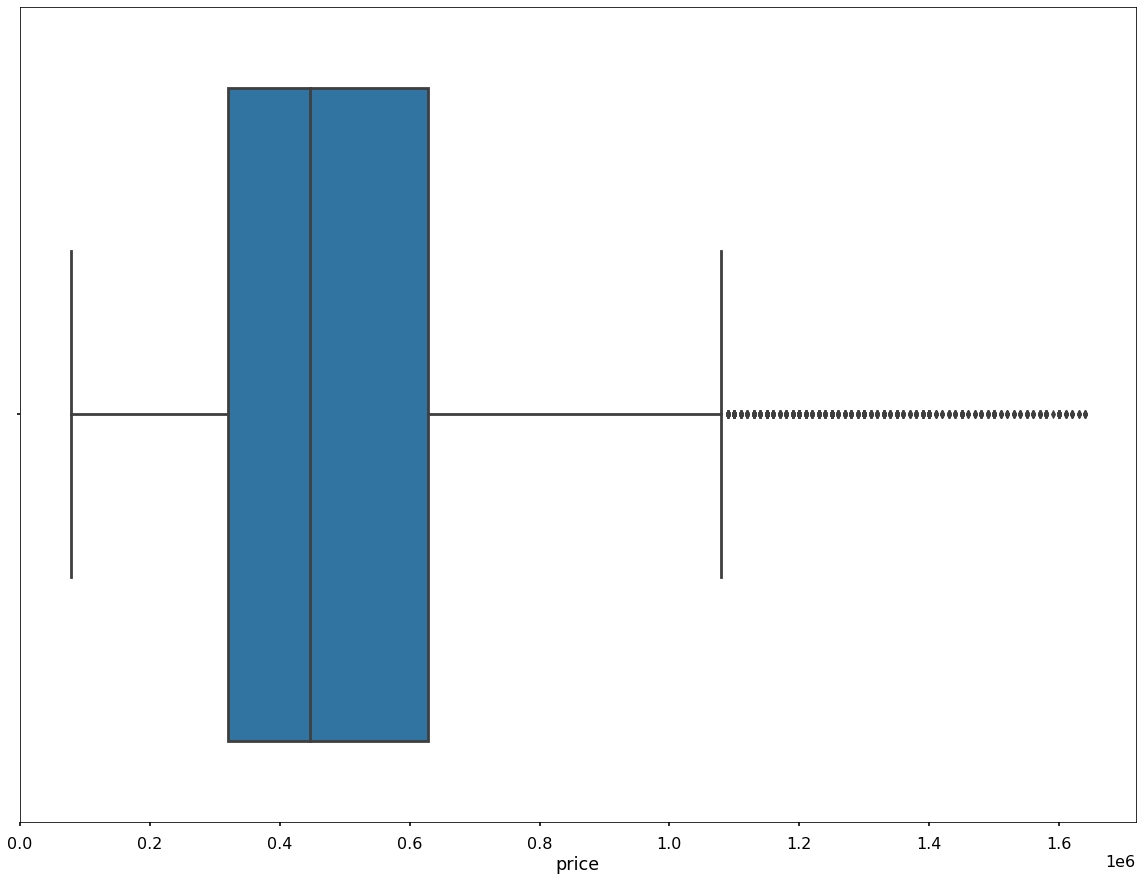

In [102]:
sns.boxplot(kings_df_cleaned[target])

### Make sure data is accurate

In [103]:
kings_df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000
mean,507010.29000,3.36000,2.09000,14826.73000,1.49000,0.00000,0.09000,3.41000,1751.50000,275.05000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259462.21000,0.92000,0.74000,40400.95000,0.54000,0.06000,0.28000,0.65000,772.21000,422.58000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.50000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,0.00000,3.00000,1544.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627650.00000,4.00000,2.50000,10490.50000,2.00000,0.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,33.00000,7.50000,1651359.00000,3.50000,1.00000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


In [104]:
kings_df_cleaned[kings_df_cleaned['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.00000,33,1.75000,6000,1.00000,0.00000,0,5,1040,580.00000,1947,0,98103,47.68780,-122.33100


In [105]:
kings_df_cleaned[(kings_df_cleaned['bedrooms'] == 3) & (kings_df_cleaned['bathrooms'] == 2) & (kings_df_cleaned['floors'] == 1) & (kings_df_cleaned['sqft_basement'] != 0)].head(50)

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,
2617300160,2014-08-12,420000.00000,3,2.00000,38332,1.00000,0.00000,0,4,1010,1010.00000,1975,0,98027,47.45820,-122.02300
7138000260,2014-06-05,279950.00000,3,2.00000,9750,1.00000,0.00000,0,3,1350,400.00000,1961,0,98198,47.39800,-122.29900
4058000060,2015-04-09,416000.00000,3,2.00000,94300,1.00000,0.00000,0,5,1640,580.00000,1976,0,98010,47.34590,-121.95000
3832710960,2014-09-23,260000.00000,3,2.00000,7209,1.00000,0.00000,0,4,1240,570.00000,1978,0,98032,47.36560,-122.27800
7771300125,2015-04-08,487000.00000,3,2.00000,14052,1.00000,0.00000,0,5,1720,870.00000,1948,0,98133,47.73570,-122.33300
2460700700,2014-05-15,252350.00000,3,2.00000,7352,1.00000,0.00000,0,3,1160,490.00000,1979,0,98058,47.46120,-122.16900
9808650060,2015-02-25,1300000.00000,3,2.00000,15021,1.00000,0.00000,0,4,1770,580.00000,1976,0,98004,47.64080,-122.21900
1723049270,2015-01-07,340500.00000,3,2.00000,28025,1.00000,0.00000,0,4,1920,350.00000,1947,0,98168,47.48570,-122.31800
1727500340,2014-06-14,397500.00000,3,2.00000,6710,1.00000,0.00000,0,3,1070,440.00000,1972,0,98034,47.71930,-122.21600


In [106]:
kings_df_cleaned = kings_df_cleaned[kings_df_cleaned['bedrooms'] != 33] 
kings_df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000
mean,507004.02000,3.35000,2.09000,14827.15000,1.49000,0.00000,0.09000,3.41000,1751.53000,275.03000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259466.72000,0.89000,0.74000,40401.85000,0.54000,0.06000,0.28000,0.65000,772.21000,422.59000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.25000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,0.00000,3.00000,1547.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627500.00000,4.00000,2.50000,10490.75000,2.00000,0.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,11.00000,7.50000,1651359.00000,3.50000,1.00000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


### Question 2: Which columns should be considered categorical?

In [ ]:
# Create scatter matrix to see if any numerical categorical values
# pd.plotting.scatter_matrix(kings_df_cleaned, figsize=(18,20));

### Answer 3: Zip code

In [107]:
cat_cols = ['zipcode']
kings_df_cleaned_ohe = pd.get_dummies(data=kings_df_cleaned, columns= cat_cols, drop_first=True)
kings_df_cleaned_ohe.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,lat,long,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00000,3,1.00000,5650,1.00000,0.00000,0,3,1180,0.00000,1955,0,47.51120,-122.25700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6414100192,2014-12-09,538000.00000,3,2.25000,7242,2.00000,0.00000,0,3,2170,400.00000,1951,1,47.72100,-122.31900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5631500400,2015-02-25,180000.00000,2,1.00000,10000,1.00000,0.00000,0,3,770,0.00000,1933,0,47.73790,-122.23300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2487200875,2014-12-09,604000.00000,4,3.00000,5000,1.00000,0.00000,0,5,1050,910.00000,1965,0,47.52080,-122.39300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1954400510,2015-02-18,510000.00000,3,2.00000,8080,1.00000,0.00000,0,3,1680,0.00000,1987,0,47.61680,-122.04500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# MODEL

In [ ]:
def model_data(df_ohe_, target='price',drop_cols=[]):

    df_ohe = df_ohe_.copy()
    
    ## Removing Cols
    for col in drop_cols:
        if col in df_ohe.columns:
            df_ohe.drop(columns=col,inplace=True)
        
    feat = '+'.join(df_ohe.drop(columns=target).columns)
    f = target + '~'+ feat

    model = smf.ols(formula, df_ohe).fit()
    return model

In [ ]:
model = model_data(kings_df_cleaned_ohe)

In [ ]:
model.params.sort_values().tail(40)

High p-values:
- yr_built
- some zipcodes

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Copied mostly from James Irvings notebook
def view_model(model,y_true=None):
    
    display(model.summary())
    resids = model.resid
    
    ## Plot
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    
    ## QQ PLOT
    sm.graphics.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    ax[0].set_title('QQ Plot')
    
    
    ## plot to test Homoskedasticity
    xs = np.linspace(0,len(resids),len(resids))
    xlabel = 'Row in Dataset'
    font_dict = dict(rotation = 0)

    ## Plot residuals
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0,color='k',zorder=-1)

    ax[1].set(ylabel='Residuals',title='Homoskedasticity Check',
              xlabel=xlabel)
    
    plt.tight_layout()
    plt.show()
    

In [ ]:
view_model(model)

In [ ]:
pvalues = model.pvalues.rename('p-values')
pvalues.sort_values(ascending=False,inplace=True)
pvalues

In [ ]:
bad_coeffs = list(pvalues[pvalues > .05].index)
if 'Intercept' in bad_coeffs:
    bad_coeffs.remove('Intercept')
len(bad_coeffs) / len(kings_df_cleaned.columns)

In [ ]:
bad_coeffs[:15]

In [ ]:
model =  create_model(kings_df_cleaned, drop_cols=bad_coeffs)
view_model(model,kings_df_cleaned[target])

# INTERPRET

In [ ]:
sns.scatterplot(data = kings_df_cleaned, x='sqft_basement', y='price')

In [ ]:
sns.scatterplot(data = kings_df_cleaned, x='sqft_above', y='price')

### Question 3: Is the condition of a house a predictor in the sale price?

In [ ]:
sns.catplot(data=kings_df_cleaned, x='condition', y='price', kind='box')

# CONCLUSIONS & RECOMMENDATIONS

- People should try to maximize the square footage of their home in order to have a higher chance of getting it to sell for more money
- It may be worthwhile to invest in making the condition better in order to sell it for more